In [1]:
import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
# 関数の定義
def func(x, a, b): return a*(np.power(np.log(x), b))

In [3]:
# 評価関数の定義、二乗誤差
def fit_func(para, x, y):
    a = para[0]
    b = para[1]
    resb = y-func(x, a, b)
    res = np.sqrt(resb.real**2+resb.imag**2)
    return res

In [4]:
# 乱数のシードの設定
np.random.seed(1234)
# ダミーデータのための正解パラメータの設定（実際にフィッテイングする際にはいらない）
A = np.random.normal(1., 0.1)
B = np.random.normal(2., 0.1)
print(A, B)

1.0471435163732492 1.8809024305293536


In [5]:
# ダミーデータの作成（実際にフィッテイングする際にはここにフィッティングしたいデータを入れる。
# 注意：複素数型であることを明示する）
x = np.array([i*0.1 + np.random.normal(0., 0.1)+0j for i in range(1000)])
y = func(x, A, B) + np.random.normal(0., 1., 1000) + \
    np.random.normal(0., 1., 1000)*1j

In [6]:
# フィッテイングの初期値の設定（これが離れすぎてるとうまくいかない）
para_ini = np.array([1., 2.])
# フィッテイング
para_opt, cov_x = leastsq(fit_func, para_ini, args=(x, y), maxfev=10000)
# para_optにフィッテイングした結果出てきたパラメータが入る
print(para_opt)

[1.03992122 1.8887346 ]


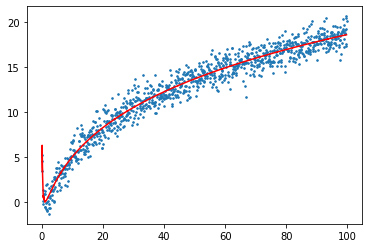

In [7]:
# 実際にフィッテイングで得られたパラメータからyを予測
y_pred = func(x, para_opt[0], para_opt[1])
# 実数部分のplot
plt.scatter(np.real(x), np.real(y), marker='.', s=10)
plt.plot(np.real(x), np.real(y_pred), color="red")
plt.show()

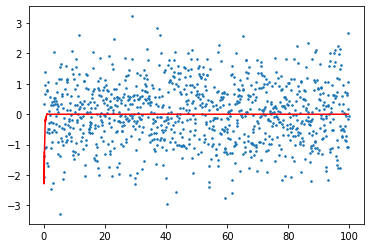

In [8]:
# 虚数部分のplot
plt.scatter(np.real(x), np.imag(y), marker='.', s=10)
plt.plot(np.real(x), np.imag(y_pred), color="red")